In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import os
import json


import librosa
from pydub import AudioSegment
import wave
import audioop
from scipy.stats import skew
from sklearn.preprocessing import normalize

from pandas import json_normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.compose import ColumnTransformer

import librosa
from scipy.stats import skew

In [122]:
print(librosa.__version__)

0.9.2


In [123]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)
    
with open('pickles/df_backup.pkl', 'rb') as f:
    df_backup = pickle.load(f)   

In [124]:
df_backup

,filename,mfccs,spectral_centroids,spectral_bandwidth,spectral_contrast,zero_crossing_rate,chroma_cens,mel_spectrogram,utteranceId
0,reportorial_2011_0251_008.wav,"[-126.05671422424426, -101.19002749389311, -99...","[6038.095879647327, 5921.462497174633, 5925.68...","[3441.737705586474, 3443.0528786884724, 3449.7...","[7.3435484953535815, 10.524865334232578, 11.43...","[0.2421875, 0.36767578125, 0.47900390625, 0.46...","[0.39785156123926, 0.39428365153592543, 0.3902...","[[0.024514753391233112, 0.06353090616141643, 0...",reportorial_2011_0251_008
1,novel_2011_0011_148.wav,"[-121.96492843244519, -101.26213882831023, -91...","[6108.933019854174, 6489.392673145858, 7062.59...","[3410.9669198867464, 3334.8172454896976, 2927....","[9.216872558732378, 6.855699247485469, 9.68757...","[0.2919921875, 0.44677734375, 0.61572265625, 0...","[0.2688603976728573, 0.26856240182738744, 0.26...","[[0.026972619362615545, 0.016543815540646878, ...",novel_2011_0011_148
2,news_2007_0095_053.wav,"[-118.59352708761149, -101.11461293214194, -99...","[5899.989282377957, 5971.627401487707, 6009.12...","[3429.1594284583457, 3432.9375159238984, 3502....","[6.467626565259497, 10.018977413419847, 12.337...","[0.24462890625, 0.373046875, 0.4951171875, 0.4...","[0.2471541048385679, 0.24726341930512472, 0.24...","[[0.044015655901669504, 0.029189123682945368, ...",news_2007_0095_053
3,sus_2009_0092_061.wav,"[-117.86614291944063, -99.66785140384654, -101...","[5999.600578606853, 6039.203999414394, 6056.42...","[3484.350502944445, 3472.1399025856167, 3440.7...","[10.326015470970201, 10.201144207754497, 11.39...","[0.24072265625, 0.3671875, 0.49853515625, 0.50...","[0.25746929767624566, 0.25787432107944513, 0.2...","[[0.02567720447688655, 0.021337334915259035, 0...",sus_2009_0092_061
4,conv_2009_0044-1_062.wav,"[-118.76443722915974, -95.12386249375803, -95....","[5909.30885991572, 5827.340700798669, 5855.833...","[3588.8484174692653, 3541.032336969246, 3533.7...","[5.618589722554515, 6.538499971022727, 8.61602...","[0.2421875, 0.36279296875, 0.45068359375, 0.43...","[0.3872634695924697, 0.38160193597169834, 0.37...","[[0.02487289921916265, 0.21090611262406525, 0....",conv_2009_0044-1_062
...,...,...,...,...,...,...,...,...,...
20095,sus_2009_0092_078.wav,"[-119.41918282574326, -100.21640115579672, -10...","[5943.702951267714, 5894.64014036367, 5921.266...","[3429.2287238041154, 3406.6286625258062, 3417....","[6.255021187860219, 7.310520314508411, 12.0398...","[0.24267578125, 0.3671875, 0.4921875, 0.477539...","[0.2487363822082759, 0.24870723309529677, 0.24...","[[0.01926367264853146, 0.03826268537946138, 0....",sus_2009_0092_078
20096,reportorial_2011_0339_005.wav,"[-126.06930955239591, -100.60590132635534, -89...","[6038.752611161056, 5826.389338333964, 5515.10...","[3437.214343158314, 3462.6126422833336, 3503.4...","[7.282488661817753, 10.395389036473546, 11.422...","[0.2421875, 0.34716796875, 0.4423828125, 0.426...","[0.24921895297310329, 0.24985453924620746, 0.2...","[[0.02448998252861934, 0.06355043575628455, 0....",reportorial_2011_0339_005
20097,news_2008_0016_012.wav,"[-123.27322325953895, -98.98248568683066, -79....","[6096.395332041753, 5757.7468469003525, 5263.7...","[3487.6273904596783, 3535.138961962535, 3611.0...","[9.630113728886444, 13.738750268408971, 11.741...","[0.2333984375, 0.30859375, 0.37890625, 0.32617...","[0.2176227126273094, 0.21897522423430252, 0.22...","[[0.10436427972700993, 0.14366405804705532, 0....",news_2008_0016_012
20098,reportorial_2011_0251_011.wav,"[-126.10965974081488, -102.17112254583145, -10...","[6039.428718646146, 5929.634466675814, 5927.65...","[3439.9239685199213, 3446.3927262402767, 3475....","[7.117795121517817, 10.170034584769864, 11.341...","[0.24609375, 0.37158203125, 0.4970703125, 0.48...","[0.2511040418287654, 0.25044378236737636, 0.24...","[[0.024501761467009293, 0.06353515796999012, 0...",reportorial_2011_0251_011


In [204]:
folder_path = 'datasets/somos/audios/'

In [205]:
df_play = 0

In [249]:
df_play = pd.DataFrame(columns=['filename', 'mfccs', 'spectral_centroids', 'zero_crossing_rate', 'chroma_cens'])

import warnings

# Filter out the FutureWarnings related to librosa
warnings.filterwarnings("ignore", message="Pass sr=32000 as keyword args.")
warnings.filterwarnings("ignore", message="Pass y=.*?, sr=32000 as keyword args.")
warnings.filterwarnings("ignore", message="The frame.append method is deprecated and will be removed from pandas in a future version.")

# Setting up Standard Scaler
scaler = StandardScaler()

# Load background noise signal
bg_level = 0.05  # Adjust this to control the background noise level
bg_sr = 44100
bg_duration = 5
bg_samples = int(bg_sr * bg_duration)
bg_noise = np.random.uniform(-1, 1, size=bg_samples) * bg_level

from tqdm import tqdm

for filename in tqdm(os.listdir(folder_path), desc='Processing audio files'):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            wav = wave.open(file_path, 'rb')
            sr = wav.getframerate()
            data = wav.readframes(wav.getnframes())
            y, _ = librosa.load(file_path, sr=None, mono=True, dtype=np.float32)
            y = np.nan_to_num(y, nan=0.0, posinf=0.0, neginf=0.0)

            # Perform peak normalization
            peak = max(abs(y))
            max_amp = 0.5
            if peak > 0:
                y = y * (max_amp / peak)

            # Perform data augmentation
            y = librosa.effects.preemphasis(y, coef=0.97)
            y = librosa.effects.pitch_shift(y, sr, n_steps=2)
            y = librosa.effects.time_stretch(y, rate=0.8)

            # Add background noise to the audio signal
            bg_start = np.random.randint(0, max(1, bg_samples - len(y)))
            bg_slice = bg_noise[bg_start : bg_start + len(y)]
            if bg_slice.shape[0] < y.shape[0]:
                bg_slice = np.tile(bg_slice, int(np.ceil(y.shape[0] / bg_slice.shape[0])))[:y.shape[0]]
            y = np.add(y, bg_slice)

            # Apply reverb to the augmented audio signal
            #y = audioop.reverb(y, sr, room_size=0.5)

            # Calculate features for the augmented audio data
            mfccs = librosa.feature.mfcc(y, sr, n_mels=40, n_fft=2048, hop_length=512, win_length=1024)[:13]
            spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean()
            #spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0].mean()
            #spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)[0].mean()
            zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0].mean()
            #chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)[0].mean()
            #mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000).mean()

            # Normalize the metrics
#             spectral_centroids_norm = scaler.fit_transform(np.array(spectral_centroids).reshape(-1, 1))
            #spectral_bandwidth_norm = scaler.fit_transform(np.array(spectral_bandwidth).reshape(-1, 1)).flatten()
#             zero_crossing_rate_norm = scaler.fit_transform(np.array(zero_crossing_rate).reshape(-1, 1))
            #chroma_cens_norm = scaler.fit_transform(np.array(chroma_cens).reshape(-1, 1)).flatten()
            mfccs_norm = librosa.util.normalize(mfccs, norm=2, axis=0)

            librosa_dict = {
            'filename': filename,
            'mfccs': mfccs_norm,
            'spectral_centroids': spectral_centroids_norm,
            #'spectral_bandwidth': spectral_bandwidth_norm,
            'zero_crossing_rate': zero_crossing_rate_norm,
            #'chroma_cens': chroma_cens_norm,
        }


            df_play = df_play.append(librosa_dict, ignore_index=True)
            
            
warnings.filterwarnings("default")

Processing audio files:   0%|                         | 0/20100 [00:00<?, ?it/s]/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:33: FutureWarning: Pass sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.effects.pitch_shift(y, sr, n_steps=2)
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:47: FutureWarning: Pass y=[-0.03595213  0.04208137  0.04037754 ... -0.01525675 -0.01925017
 -0.02501513], sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr, n_mels=40, n_fft=2048, hop_length=512, win_length=1024)[:13]
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(librosa_dict, ignore_index=True)

/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:47: FutureWarning: Pass y=[ 0.04795125 -0.02920941  0.03882595 ... -0.03177473 -0.03713662
 -0.00690889], sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr, n_mels=40, n_fft=2048, hop_length=512, win_length=1024)[:13]
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(librosa_dict, ignore_index=True)
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:33: FutureWarning: Pass sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.effects.pitch_shift(y, sr, n_steps=2)
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:47

/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:47: FutureWarning: Pass y=[-0.02526507 -0.02403043  0.02650374 ...  0.0445653  -0.03010852
  0.03331629], sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr, n_mels=40, n_fft=2048, hop_length=512, win_length=1024)[:13]
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(librosa_dict, ignore_index=True)
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:33: FutureWarning: Pass sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.effects.pitch_shift(y, sr, n_steps=2)
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:47

/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:47: FutureWarning: Pass y=[-0.03600131  0.04209799  0.04041327 ... -0.02431988  0.0383167
  0.03190764], sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr, n_mels=40, n_fft=2048, hop_length=512, win_length=1024)[:13]
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(librosa_dict, ignore_index=True)
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:33: FutureWarning: Pass sr=24000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.effects.pitch_shift(y, sr, n_steps=2)
/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/443696330.py:47:

KeyboardInterrupt: 

In [250]:
# df_play = df_backup[['filename','mfccs','spectral_centroids', 'spectral_bandwidth', 'spectral_contrast']]

In [251]:
def remove_layer(lst):
    return np.array(lst).flatten().tolist()

# apply function to 'mfccs' column
df_play['mfccs'] = df_play['mfccs'].apply(remove_layer)

In [252]:
df_play

,filename,mfccs,spectral_centroids,zero_crossing_rate,chroma_cens
0,reportorial_2011_0251_008.wav,"[-0.9966153196149639, -0.9975262345544413, -0....",[[0.0]],[[0.0]],NaN
1,novel_2011_0011_148.wav,"[-0.9916557307332697, -0.9980146276876997, -0....",[[0.0]],[[0.0]],NaN
2,news_2007_0095_053.wav,"[-0.992350148008928, -0.994832396706674, -0.99...",[[0.0]],[[0.0]],NaN
3,sus_2009_0092_061.wav,"[-0.9965422337260083, -0.9991040103027107, -0....",[[0.0]],[[0.0]],NaN
4,conv_2009_0044-1_062.wav,"[-0.99845690427741, -0.9972455732471454, -0.99...",[[0.0]],[[0.0]],NaN
5,reportorial_2011_0140_039.wav,"[-0.9958077333746495, -0.9971583122514655, -0....",[[0.0]],[[0.0]],NaN
6,novel_2011_0070_100.wav,"[-0.9955270438876822, -0.997991370352602, -0.9...",[[0.0]],[[0.0]],NaN
7,LJ034-0177_142.wav,"[-0.9961760830306419, -0.9966828838218781, -0....",[[0.0]],[[0.0]],NaN
8,novel_2007_0029_128.wav,"[-0.99790838335599, -0.9949366383350866, -0.99...",[[0.0]],[[0.0]],NaN
9,LJ039-0159_135.wav,"[-0.9977225126992284, -0.9980952965693297, -0....",[[0.0]],[[0.0]],NaN


In [253]:
df_play['mfccs'][0]

[-0.9966153196149639,
 -0.9975262345544413,
 -0.9945821765311867,
 -0.9973084298425694,
 -0.9952033087480674,
 -0.990241743123663,
 -0.9884291654490853,
 -0.9858102959457865,
 -0.9900646782070659,
 -0.9950266632473727,
 -0.9868946452247527,
 -0.987414089598791,
 -0.9943592089191786,
 -0.9914451162953467,
 -0.9901841718949803,
 -0.9977886724257985,
 -0.996013679232526,
 -0.9982373403227945,
 -0.9964373258095026,
 -0.9917904441410446,
 -0.9911760123810435,
 -0.9905453191795501,
 -0.992075761134955,
 -0.9949557520678998,
 -0.9958327201785256,
 -0.9965478941538527,
 -0.9939093108722121,
 -0.9945461390168755,
 -0.9964413127870378,
 -0.9950746290617414,
 -0.9962645735037685,
 -0.9954198469768171,
 -0.9956117740120459,
 -0.9978499627183833,
 -0.9974696508815293,
 -0.9935516694972916,
 -0.9949148629200725,
 -0.9826681275271161,
 -0.975205150980067,
 -0.9688050265470421,
 -0.9765861623188454,
 -0.9837638583742464,
 -0.9941535810713994,
 -0.9972086504061253,
 -0.9943505886617141,
 -0.99534250377

In [196]:
def mean_metrics(df,column):
    return df[column].apply(np.mean)

In [197]:
mfcc_mean = mean_metrics(df_play, 'mfccs')
cent_mean = mean_metrics(df_play,'spectral_centroids')
band_mean = mean_metrics(df_play,'spectral_bandwidth')
# contrast_mean = mean_metrics(df_play,'spectral_contrast')

In [198]:
def unpack_lists(df, column):
    max_cols = 13
    col_names = [f"{column}_{i}" for i in range(max_cols)]
    unpacked = pd.DataFrame(df[column].to_list(), columns=col_names)
    df = pd.concat([df.drop(columns=[column]), unpacked], axis=1)

    return df

In [199]:
mfcc_cols = unpack_lists(df_play, 'mfccs')

ValueError: 13 columns passed, passed data had 15236 columns

In [173]:
mfcc_cols

,filename,spectral_centroids,zero_crossing_rate,chroma_cens,spectral_bandwidth,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,...,mfccs_15226,mfccs_15227,mfccs_15228,mfccs_15229,mfccs_15230,mfccs_15231,mfccs_15232,mfccs_15233,mfccs_15234,mfccs_15235
0,reportorial_2011_0251_008.wav,[0.0],[0.0],[0.0],[0.0],-0.998567,-0.997640,-0.996446,-0.996292,-0.995435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,novel_2011_0011_148.wav,[0.0],[0.0],[0.0],[0.0],-0.996622,-0.996896,-0.990560,-0.954500,-0.922314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,news_2007_0095_053.wav,[0.0],[0.0],[0.0],[0.0],-0.997721,-0.996852,-0.995628,-0.995860,-0.990949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sus_2009_0092_061.wav,[0.0],[0.0],[0.0],[0.0],-0.994894,-0.998764,-0.996525,-0.995704,-0.998065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,conv_2009_0044-1_062.wav,[0.0],[0.0],[0.0],[0.0],-0.998275,-0.997324,-0.995449,-0.992939,-0.991508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,news_2009_0035_053.wav,[0.0],[0.0],[0.0],[0.0],-0.995616,-0.997077,-0.994422,-0.993111,-0.985269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12718,novel_2009_0089_128.wav,[0.0],[0.0],[0.0],[0.0],-0.995675,-0.995975,-0.997049,-0.983761,-0.976998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12719,general_0102_109.wav,[0.0],[0.0],[0.0],[0.0],-0.996757,-0.997005,-0.990091,-0.991384,-0.978923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12720,conv_2007_0061_008.wav,[0.0],[0.0],[0.0],[0.0],-0.993847,-0.997359,-0.996997,-0.996821,-0.994362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df_mean_metrics

,spectral_centroids,zero_crossing_rate,chroma_cens,spectral_bandwidth,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,...,mfccs_15228,mfccs_15229,mfccs_15230,mfccs_15231,mfccs_15232,mfccs_15233,mfccs_15234,mfccs_15235,mfcc_mean,utteranceId
0,[0.0],[0.0],[0.0],[0.0],-0.998567,-0.997640,-0.996446,-0.996292,-0.995435,-0.994273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079514,reportorial_2011_0251_008
1,[0.0],[0.0],[0.0],[0.0],-0.996622,-0.996896,-0.990560,-0.954500,-0.922314,-0.892736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079179,novel_2011_0011_148
2,[0.0],[0.0],[0.0],[0.0],-0.997721,-0.996852,-0.995628,-0.995860,-0.990949,-0.992945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079914,news_2007_0095_053
3,[0.0],[0.0],[0.0],[0.0],-0.994894,-0.998764,-0.996525,-0.995704,-0.998065,-0.996351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078822,sus_2009_0092_061
4,[0.0],[0.0],[0.0],[0.0],-0.998275,-0.997324,-0.995449,-0.992939,-0.991508,-0.985145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079342,conv_2009_0044-1_062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,[0.0],[0.0],[0.0],[0.0],-0.995616,-0.997077,-0.994422,-0.993111,-0.985269,-0.974218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079385,news_2009_0035_053
12718,[0.0],[0.0],[0.0],[0.0],-0.995675,-0.995975,-0.997049,-0.983761,-0.976998,-0.974534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079185,novel_2009_0089_128
12719,[0.0],[0.0],[0.0],[0.0],-0.996757,-0.997005,-0.990091,-0.991384,-0.978923,-0.993145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080552,general_0102_109
12720,[0.0],[0.0],[0.0],[0.0],-0.993847,-0.997359,-0.996997,-0.996821,-0.994362,-0.993968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.081212,conv_2007_0061_008


In [175]:
mfcc_cols['mfcc_mean'] = mfcc_mean

In [176]:
df_mean_metrics = mfcc_cols

In [177]:
df_mean_metrics['filename'] = df_mean_metrics['filename'].str.rstrip('.wav')
df_mean_metrics['utteranceId'] =  df_mean_metrics['filename']
df_mean_metrics = df_mean_metrics.drop('filename',axis = 1)

In [178]:
df_model = pd.merge(df, df_mean_metrics, on = 'utteranceId')


In [179]:
df_model

,utteranceId,choice,sentenceId,systemId,modelId,testpageId,locale,listenerId,isNative,wrongValidation,...,mfccs_15227,mfccs_15228,mfccs_15229,mfccs_15230,mfccs_15231,mfccs_15232,mfccs_15233,mfccs_15234,mfccs_15235,mfcc_mean
0,novel_2007_0098_015,4,novel_2007_0098,15,m1,0,gb,KEXM49572020611127,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080136
1,novel_2007_0098_015,2,novel_2007_0098,15,m1,0,gb,ONJP34545176526892,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080136
2,novel_2007_0098_015,2,novel_2007_0098,15,m1,0,gb,BRHE82716530388427,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080136
3,novel_2007_0098_015,5,novel_2007_0098,15,m1,0,gb,IJWO22856390758743,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080136
4,novel_2007_0098_015,5,novel_2007_0098,15,m1,0,gb,BFXL60735888172229,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,reportorial_2011_0141_160,3,reportorial_2011_0141,160,m5,993,us,SQZP20987165412056,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079975
214542,reportorial_2011_0141_160,4,reportorial_2011_0141,160,m5,993,us,VOPC28548555753770,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079975
214543,reportorial_2011_0141_160,4,reportorial_2011_0141,160,m5,993,us,QQXJ36618242908678,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079975
214544,reportorial_2011_0141_160,2,reportorial_2011_0141,160,m5,993,us,KRQC01203593359590,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079975


In [180]:
df_model = df_model.drop_duplicates('utteranceId')

In [191]:
df_model[df_model['modelId'] =='m0'].head(5)

,utteranceId,choice,sentenceId,systemId,modelId,testpageId,locale,listenerId,isNative,wrongValidation,...,mfccs_654,mfccs_655,mfccs_656,mfccs_657,mfccs_658,mfccs_659,mfccs_660,mfccs_661,mfccs_662,mfcc_mean


In [183]:
df_model['modelId'] = np.where(df_model['modelId'] == 'm0',1,0)

/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_1626/294847473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['modelId'] = np.where(df_model['modelId'] == 'm0',1,0)


In [184]:
generated = df_model[df_model['modelId'] != 1]
human = df_model[df_model['modelId'] == 1]

In [185]:
mfcc_cols = ['mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12']

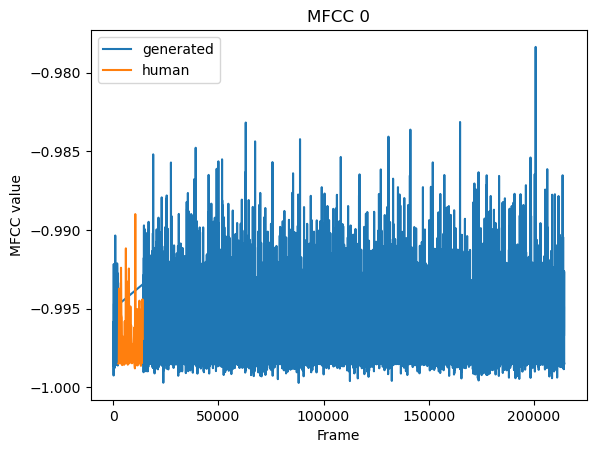

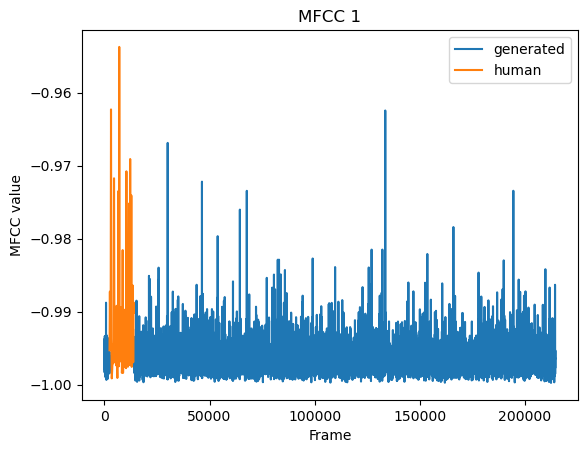

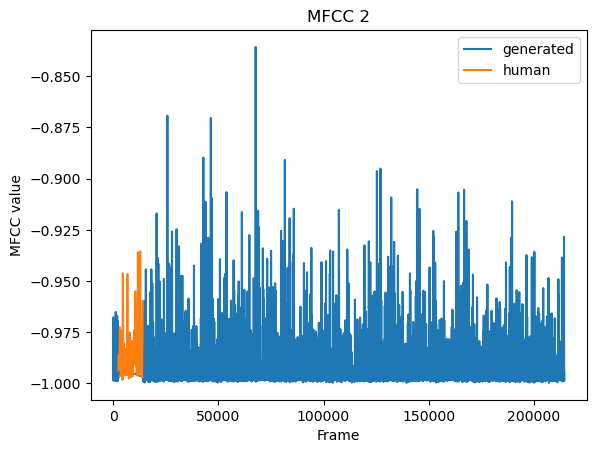

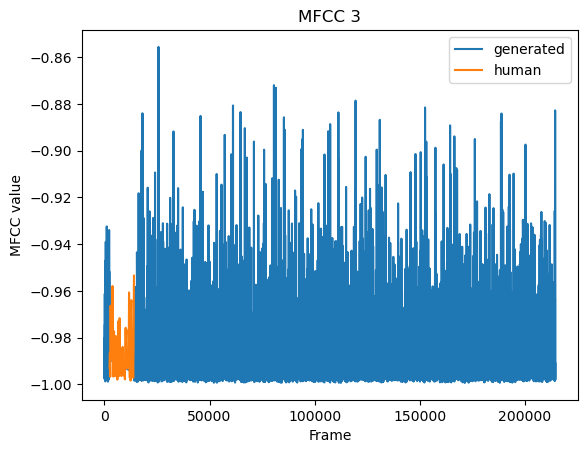

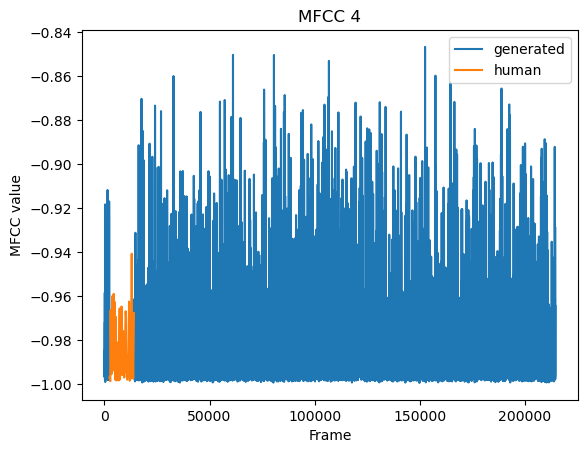

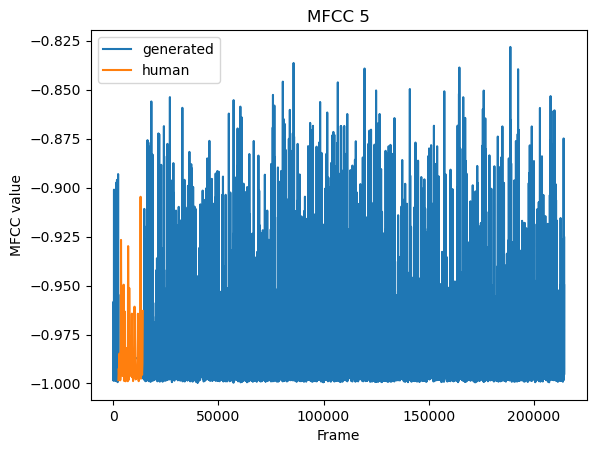

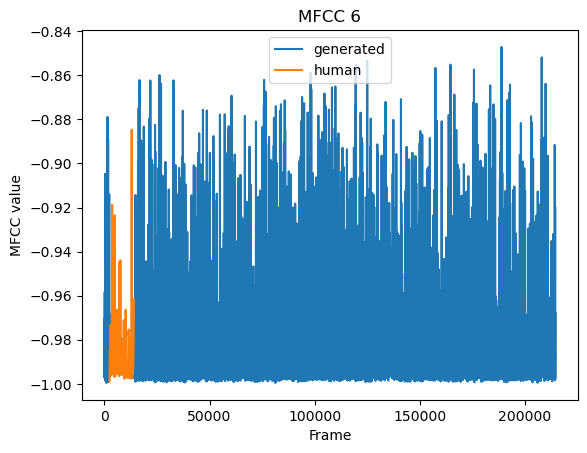

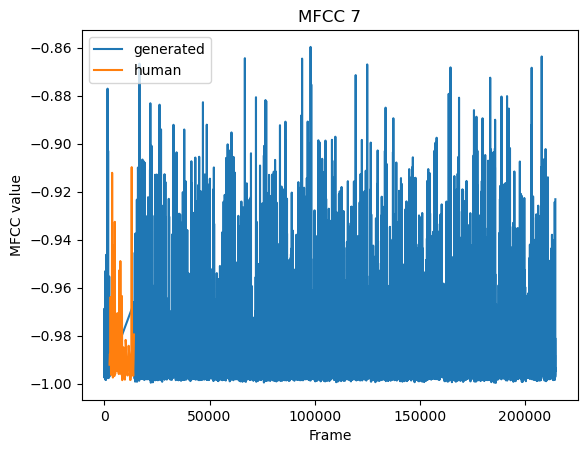

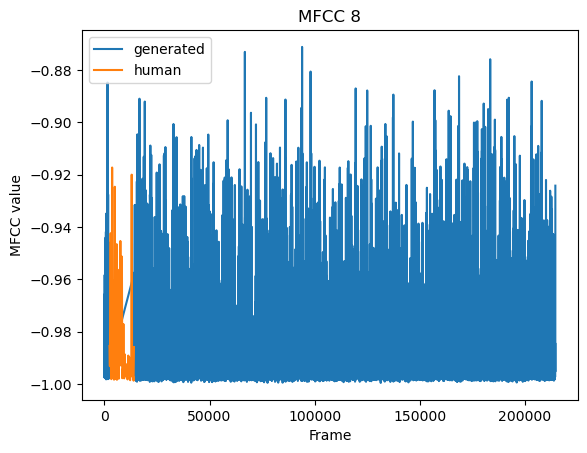

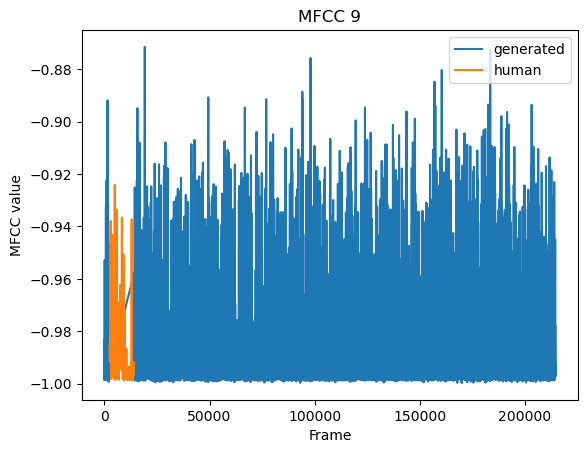

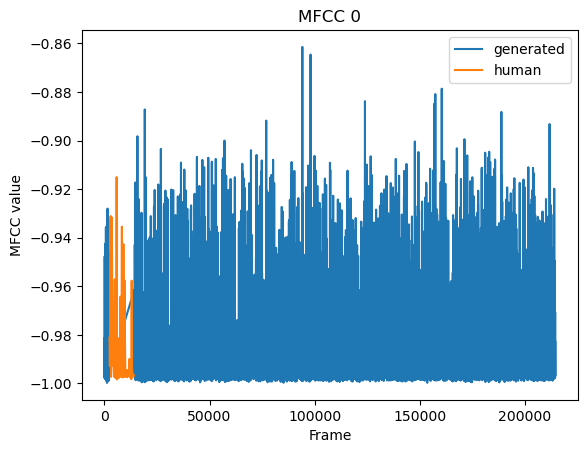

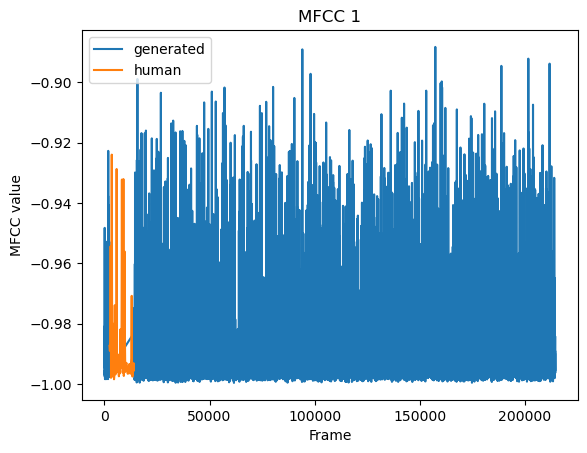

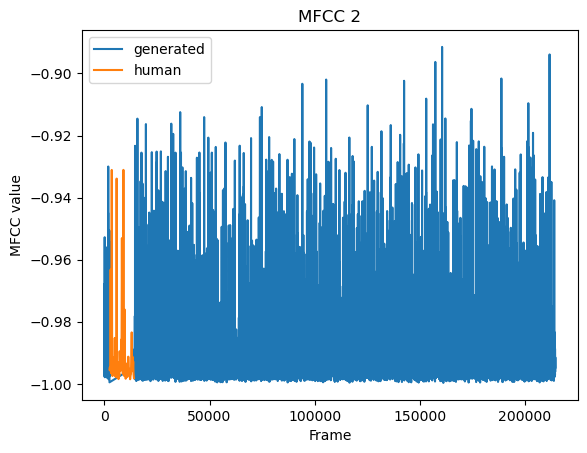

In [186]:
generated = df_model[df_model['modelId'] != 1]
human = df_model[df_model['modelId'] == 1]

mfcc_cols = ['mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12']

for col in mfcc_cols:
    plt.plot(generated[col], label='generated')
    plt.plot(human[col], label='human')
    plt.xlabel('Frame')
    plt.ylabel('MFCC value')
    plt.title(f'MFCC {col[-1]}')
    plt.legend()
    plt.show()

In [115]:
generated = df_model[df_model['modelId'] != 1]
human = df_model[df_model['modelId'] == 1]

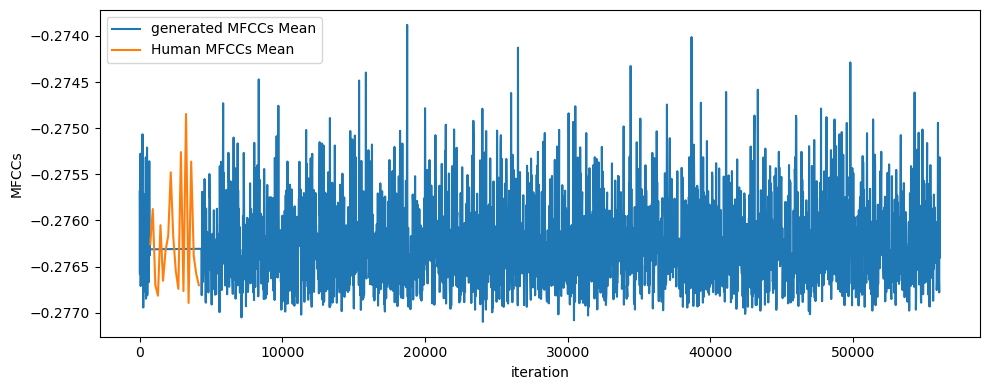

In [116]:
plt.figure(figsize=(10, 4))
plt.plot(generated['mfcc_mean'], label='generated MFCCs Mean')
plt.plot(human['mfcc_mean'], label='Human MFCCs Mean')
plt.ylabel('MFCCs')
plt.xlabel('iteration')

plt.legend()
plt.tight_layout()
plt.show()

In [117]:
# human['mfccs'].shape

In [118]:
# generated_mfccs = generated['mfccs'].to_numpy()
# generated_sc = generated['spectral_centroids'].to_numpy()
# generated_sb = generated['spectral_bandwidth'].to_numpy()
# generated_sc_contrast = generated['spectral_contrast'].to_numpy()
# # generated_zcr = generated['zero_crossing_rate'].to_numpy()

# # Calculate the minimum and maximum values of the generated MFCCs
# mfccs_min = np.amin(generated_mfccs)
# mfccs_max = np.amax(generated_mfccs)

# sc_min = np.amin(generated_sc)
# sc_max = np.amax(generated_sc)

# sb_min = np.amin(generated_sb)
# sb_max = np.amax(generated_sb)

# sc_contrast_min = np.amin(generated_sc_contrast)
# sc_contrast_max = np.amax(generated_sc_contrast)

# # zcr_min = np.amin(generated_zcr)
# # zcr_max = np.amax(generated_zcr)

# # chroma_min = np.amin(generated_chroma)
# # chroma_max = np.amax(generated_chroma)

# # mspec_min = np.amin(generated_mel_spectrogram)
# # mspec_max = np.amax(generated_mel_spectrogram)

In [119]:
# from sklearn.preprocessing import MinMaxScaler

# scaler_mfccs = MinMaxScaler(feature_range=(mfccs_min, mfccs_max))
# scaler_centroids = MinMaxScaler(feature_range=(sc_min, sc_max))
# scaler_bandwidth = MinMaxScaler(feature_range=(sb_min, sb_max))
# scaler_contrast = MinMaxScaler(feature_range=(sc_contrast_min, sc_contrast_max))

# # Apply scaling to each metric column
# human['mfccs'] = scaler_mfccs.fit_transform(human['mfccs'].to_numpy().reshape(-1, 1))
# human['spectral_centroids'] = scaler_centroids.fit_transform(human['spectral_centroids'].to_numpy().reshape(-1, 1))
# human['spectral_bandwidth'] = scaler_bandwidth.fit_transform(human['spectral_bandwidth'].to_numpy().reshape(-1, 1))
# human['spectral_contrast'] = scaler_contrast.fit_transform(human['spectral_contrast'].to_numpy().reshape(-1, 1))


In [46]:
df_model = pd.concat([mfcc_cols],axis =0)

In [47]:
drop_columns = ['modelId','choice','isNative','wrongValidation','lowNatural','sameScores','highSynthetic','clean','listenerReliability']
keep_columns = ['mfccs']

In [48]:
df_model

,utteranceId,choice,sentenceId,systemId,modelId,testpageId,locale,listenerId,isNative,wrongValidation,lowNatural,sameScores,highSynthetic,clean,listenerReliability,MOS,mfccs,spectral_centroids,spectral_bandwidth
743,gt_LJ027-0063_000,3,LJ027-0063,0,1,5,gb,VHEQ45902658531068,1,1,1,1,0,0,0.49,4.079747,-0.276257,0.0,0.0
919,gt_LJ045-0096_000,4,LJ045-0096,0,1,8,gb,YYEN86751262713623,1,1,1,1,1,1,0.87,4.079747,-0.275877,0.0,0.0
1098,gt_LJ035-0027_000,5,LJ035-0027,0,1,18,gb,SEUE79564820363861,1,1,1,1,1,1,1.00,4.079747,-0.276701,0.0,0.0
1282,gt_LJ042-0157_000,5,LJ042-0157,0,1,26,gb,NWTA55526833188878,1,1,1,1,1,1,0.45,4.079747,-0.276816,0.0,0.0
1458,gt_LJ010-0125_000,3,LJ010-0125,0,1,27,gb,VHEQ45902658531068,1,1,1,1,0,0,0.49,4.079747,-0.276052,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56018,conv_2009_0006-2_160,5,conv_2009_0006-2,160,0,873,gb,KWQH71650487515953,1,1,1,0,0,0,0.07,3.436844,-0.276632,0.0,0.0
56035,reportorial_2011_0043_160,3,reportorial_2011_0043,160,0,904,gb,OLFI01700308772743,1,0,1,1,1,0,0.35,3.436844,-0.276781,0.0,0.0
56053,sus_2010_0004_160,3,sus_2010_0004,160,0,935,gb,YYEN86751262713623,1,1,1,1,1,1,0.87,3.436844,-0.275315,0.0,0.0
56070,conv_2009_0032-1_160,4,conv_2009_0032-1,160,0,957,gb,QJZG78851118695708,1,1,1,1,1,1,0.38,3.436844,-0.276406,0.0,0.0


In [108]:
X = df_model[mfcc_cols]
y = df_model['modelId']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [110]:
# X_train = X_train.to_numpy().reshape(-1, 1)
# X_test = X_test.to_numpy().reshape(-1, 1)

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [111]:
model_rf = RandomForestClassifier()
model_rf.fit(Z_train,y_train)
y_pred = model_rf.predict(Z_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       589
           1       0.50      0.25      0.33         4

    accuracy                           0.99       593
   macro avg       0.75      0.62      0.66       593
weighted avg       0.99      0.99      0.99       593



In [256]:
df_mz = pd.DataFrame(pd.read_csv('datasets/cv-corpus-12.0-delta-2022-12-07/en/validated.tsv',sep="\t"))
df_mz

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,0277a1e08f90eababc0042d066dc2a67dad837ea38c7a3...,common_voice_en_35244283.mp3,"He was commonly referred to as the ""Blacksmith...",2,0,NaN,NaN,NaN,en,NaN
1,02989caf9972c52df171813798df5c6f4043af96657d32...,common_voice_en_35387333.mp3,No one else could claim that.,2,0,NaN,NaN,NaN,en,NaN
2,030e18361c6f9506b86215891b722f6d9b3b3e48be2cda...,common_voice_en_35273538.mp3,The game was also released on the N-Gage.,2,0,NaN,NaN,NaN,en,NaN
3,05a2ad5cabbd42ef949ed66a3708f34be0e7941b1a9a06...,common_voice_en_35003570.mp3,Her father was an alderman in the city governm...,2,0,NaN,NaN,NaN,en,NaN
4,05a3f4067ed4753da9f9d9d4cd23e51c94e4cd1f62adb8...,common_voice_en_35123560.mp3,The film and each of its vignettes revolve clo...,2,0,NaN,NaN,NaN,en,NaN
...,...,...,...,...,...,...,...,...,...,...
6712,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_35341669.mp3,"Deja was born in Poland, but moved with his fa...",2,0,thirties,female,United States English,en,NaN
6713,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_35341687.mp3,His breakthrough performances led him to be la...,2,0,thirties,female,United States English,en,NaN
6714,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_35341714.mp3,"It was originally titled ""Flippy"" until Sega e...",2,0,thirties,female,United States English,en,NaN
6715,f55a837f1dcff9be74f291521ca3af019920f9357bf021...,common_voice_en_35341715.mp3,It is a very simple format to manually mark up.,4,0,thirties,female,United States English,en,NaN


In [257]:
df_mz.isna().sum()

client_id        0
path             0
sentence         0
up_votes         0
down_votes       0
age            934
gender         934
accents        725
locale           0
segment       6717
dtype: int64